### Data Cleaning: The BOM Dataset 

##### The Box Office Mojo dataset contains movie financial performance data, mainly focusing on box office revenue.To ensure the data is ready for analysis, the following preprocessing steps were performed:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns 
import numpy as np
from scipy.stats import ttest_ind, f_oneway




In [3]:
data_path = ('../data/zippedData/')

In [4]:
bom = pd.read_csv(data_path + "bom.movie_gross.csv.gz")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


##### Understanding the Dataset

In [5]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


##### The dataset has 3387 rows and 5 columns

In [6]:
#checking for datatypes
bom.dtypes


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [7]:
# Checking for columns in the Dataframe
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

##### Getting the statistical summary of the DataFrame Columns

In [8]:
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


####  Detecting Missing Values

In [9]:
# Counting missing values per column
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

##### From the dataset information above, we see that two columns has minimal missing values

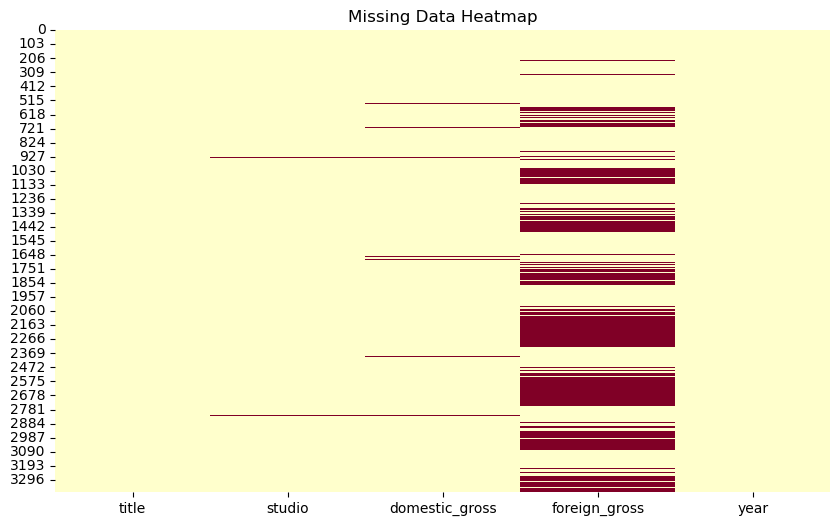

In [10]:
#Plot a heatmap to show missing values

plt.figure(figsize=(10, 6))
sns.heatmap(bom.isnull(), cmap="YlOrRd", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


#### Dropping the rows with minimal missing Values

In [11]:
# Dropping studio and domestic_gross (missing values are minimal)
bom = bom.dropna(subset=['studio','domestic_gross'])

bom = bom.reset_index(drop=True)

In [12]:
#checking how many missing values are in each column of the dataframe bom.
bom.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

##### The studio and domestic gross missing values has been dropped and now we have no missing values in those columns.

### Imputing the columns 

##### Replacing missing values with unknowns for catergorical columns, 0 for Numerical colums and mode for the year column.

In [13]:
# Categorical columns: Title, studio
bom['title'] = bom['title'].fillna('Unknown')
bom['studio'] = bom['studio'].fillna('Unknown')

#Numerical columns: domestic_gross, foreign_gross
bom['domestic_gross'] = bom['domestic_gross'].fillna(0)
bom['foreign_gross'] = bom['foreign_gross'].fillna(0)

# Filling the year column with the mode year
bom['year'] = bom['year'].fillna(bom['year'].mode()[0])

bom.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Dealing with Inconsistencies

#### Checking Inconsistencies in categorical columns

In [14]:
bom["title"].unique().tolist()

['Toy Story 3',
 'Alice in Wonderland (2010)',
 'Harry Potter and the Deathly Hallows Part 1',
 'Inception',
 'Shrek Forever After',
 'The Twilight Saga: Eclipse',
 'Iron Man 2',
 'Tangled',
 'Despicable Me',
 'How to Train Your Dragon',
 'Clash of the Titans (2010)',
 'The Chronicles of Narnia: The Voyage of the Dawn Treader',
 "The King's Speech",
 'Tron Legacy',
 'The Karate Kid',
 'Prince of Persia: The Sands of Time',
 'Black Swan',
 'Megamind',
 'Robin Hood',
 'The Last Airbender',
 'Little Fockers',
 'Resident Evil: Afterlife',
 'Shutter Island',
 'Salt',
 'Sex and the City 2',
 'The Tourist',
 'The Expendables',
 'Grown Ups',
 'Knight & Day',
 'True Grit',
 "Gulliver's Travels",
 'Percy Jackson & The Olympians: The Lightning Thief',
 'The Social Network',
 "Valentine's Day",
 "The Sorcerer's Apprentice",
 'Due Date',
 'Eat Pray Love',
 'Yogi Bear',
 'Red',
 'Paranormal Activity 2',
 'The A-Team',
 'Jackass 3-D',
 'The Other Guys',
 'Unstoppable',
 'Step Up 3-D',
 'The Book of E

In [15]:
bom['studio'].unique().tolist()

['BV',
 'WB',
 'P/DW',
 'Sum.',
 'Par.',
 'Uni.',
 'Fox',
 'Wein.',
 'Sony',
 'FoxS',
 'SGem',
 'WB (NL)',
 'LGF',
 'MBox',
 'CL',
 'W/Dim.',
 'CBS',
 'Focus',
 'MGM',
 'Over.',
 'Mira.',
 'IFC',
 'CJ',
 'NM',
 'SPC',
 'ParV',
 'Gold.',
 'JS',
 'RAtt.',
 'Magn.',
 'Free',
 '3D',
 'UTV',
 'Rela.',
 'Zeit.',
 'Anch.',
 'PDA',
 'Lorb.',
 'App.',
 'Drft.',
 'Osci.',
 'IW',
 'Rog.',
 'Eros',
 'Relbig.',
 'Viv.',
 'Hann.',
 'Strand',
 'NGE',
 'Scre.',
 'Kino',
 'Abr.',
 'CZ',
 'ATO',
 'First',
 'GK',
 'FInd.',
 'NFC',
 'TFC',
 'Pala.',
 'Imag.',
 'NAV',
 'Arth.',
 'CLS',
 'Mont.',
 'Olive',
 'CGld',
 'FOAK',
 'IVP',
 'Yash',
 'ICir',
 'FM',
 'Vita.',
 'WOW',
 'Truly',
 'Indic.',
 'FD',
 'Vari.',
 'TriS',
 'ORF',
 'IM',
 'Elev.',
 'Cohen',
 'NeoC',
 'Jan.',
 'MNE',
 'Trib.',
 'Rocket',
 'OMNI/FSR',
 'KKM',
 'Argo.',
 'SMod',
 'Libre',
 'FRun',
 'WHE',
 'P4',
 'KC',
 'SD',
 'AM',
 'MPFT',
 'Icar.',
 'AGF',
 'A23',
 'Da.',
 'NYer',
 'Rialto',
 'DF',
 'KL',
 'ALP',
 'LG/S',
 'WGUSA',
 'MPI',
 'R

 #### Fixing Inconsistencies

In [16]:
# Fix inconsistencies in categorical columns
bom['studio'] = bom['studio'].str.strip()  # Remove leading/trailing whitespace
bom['title'] = bom['title'].str.strip()  # Standardize capitalization

In [17]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 131.2+ KB


### Changing Data types of columns

##### We change data types to ensure each column is in the correct format so calculations, analysis, and merging work accurately without errors.

In [18]:
bom[bom.select_dtypes(include="float64").columns] = bom[bom.select_dtypes(include="float64").columns].astype("int64")
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3356 non-null   object
 1   studio          3356 non-null   object
 2   domestic_gross  3356 non-null   int64 
 3   foreign_gross   3356 non-null   object
 4   year            3356 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 131.2+ KB


In [19]:
## viewing the first 10 rows after cleaning the data
bom.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010
6,Iron Man 2,Par.,312400000,311500000,2010
7,Tangled,BV,200800000,391000000,2010
8,Despicable Me,Uni.,251500000,291600000,2010
9,How to Train Your Dragon,P/DW,217600000,277300000,2010


##### This is the cleaned data with no missing values, with data types as integer and object, with no inconcistencies

In [20]:
# Saving the cleaned DataFrame to a new CSV file
bom_cleaned = bom.copy()
bom_cleaned.to_csv('../data/cleanedData/bom_cleaned_data.csv', index=False)

In [21]:
data_path = ('../data/cleanedData/')


In [22]:
bom = pd.read_csv("../data/cleanedData/bom_cleaned_data.csv")
imdb = pd.read_csv("../data/cleanedData/imdb_cleaned_data.csv")
rt = pd.read_csv("../data/cleanedData/rt_master_cleaned.csv") 
tn = pd.read_csv("../data/cleanedData/tndb_cleaned_data.csv") 
tmdb = pd.read_csv("../data/cleanedData/tmdb_cleaned_data.csv") 


## Objective: Competitive Positioning Analysis

In today’s globalized film market, understanding how different regions and seasons influence box office performance is essential to building and maintaining a competitive edge. This analysis examines two critical dimensions:

- How do domestic versus foreign markets respond differently to various genres, and   should we develop region-specific content strategies?
- What seasonal or temporal patterns exist in box office performance across different genres?

By integrating insights from regional audience preferences and temporal release windows, we aim to develop a targeted, data-informed content and distribution strategy that optimizes global reach, maximizes profitability, and strengthens our competitive position in an increasingly crowded entertainment.






#### 1. How do domestic vs foreign markets respond differently to various genres, and should we develop region-specific content strategies?

#### Merge BOM + IMDb (with title cleaning)
Cleaning the movie titles in both the Box Office Mojo and IMDb datasets by converting them to lowercase and removing extra spaces, then we merge the datasets so that we can combine revenue information (domestic and foreign gross) with genre information from IMDb.



In [23]:
# 1. Clean titles for merging
bom["title_clean"] = bom["title"].astype(str).str.lower().str.strip()
imdb["title_clean"] = imdb["primary_title"].astype(str).str.lower().str.strip()

# 2. Merge BOM + IMDb
bom_imdb = pd.merge(
    bom,
    imdb,
    on="title_clean",
    how="inner"
)

# 3. Clean money columns
for col in ["domestic_gross", "foreign_gross"]:
    bom_imdb[col] = pd.to_numeric(bom_imdb[col], errors="coerce").fillna(0)

# Add total gross
bom_imdb["total_gross"] = bom_imdb["domestic_gross"] + bom_imdb["foreign_gross"]

# Remove rows with zero total gross
bom_imdb = bom_imdb[bom_imdb["total_gross"] > 0]
bom_imdb.head()


,title,studio,domestic_gross,foreign_gross,year,title_clean,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,total_gross
0,Toy Story 3,BV,415000000,652000000.0,2010,toy story 3,tt0435761,Toy Story 3,2010,103,"adventure,animation,comedy",8.3,682218,1.067000e+09
1,Inception,WB,292600000,535700000.0,2010,inception,tt1375666,Inception,2010,148,"action,adventure,sci-fi",8.8,1841066,8.283000e+08
2,Shrek Forever After,P/DW,238700000,513900000.0,2010,shrek forever after,tt0892791,Shrek Forever After,2010,93,"adventure,animation,comedy",6.3,167532,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000,398000000.0,2010,the twilight saga: eclipse,tt1325004,The Twilight Saga: Eclipse,2010,124,"adventure,drama,fantasy",5.0,211733,6.985000e+08
4,Iron Man 2,Par.,312400000,311500000.0,2010,iron man 2,tt1228705,Iron Man 2,2010,124,"action,adventure,sci-fi",7.0,657690,6.239000e+08


#### Expand Genres 
Splitting the IMDb genres column because many movies contain multiple genres in one cell, and we use the explode function so that each movie can appear in multiple rows, with one genre per row, which allows accurate genre-level analysis.

In [24]:
# Keep only rows with genres
bom_imdb = bom_imdb.dropna(subset=["genres"])

# Split genres into separate rows
genre_df = bom_imdb.copy()
genre_df["genres"] = genre_df["genres"].str.split(",")

genre_df = genre_df.explode("genres")
genre_df["genres"] = genre_df["genres"].str.strip()

genre_df.head()


,title,studio,domestic_gross,foreign_gross,year,title_clean,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,total_gross
0,Toy Story 3,BV,415000000,652000000.0,2010,toy story 3,tt0435761,Toy Story 3,2010,103,adventure,8.3,682218,1.067000e+09
0,Toy Story 3,BV,415000000,652000000.0,2010,toy story 3,tt0435761,Toy Story 3,2010,103,animation,8.3,682218,1.067000e+09
0,Toy Story 3,BV,415000000,652000000.0,2010,toy story 3,tt0435761,Toy Story 3,2010,103,comedy,8.3,682218,1.067000e+09
1,Inception,WB,292600000,535700000.0,2010,inception,tt1375666,Inception,2010,148,action,8.8,1841066,8.283000e+08
1,Inception,WB,292600000,535700000.0,2010,inception,tt1375666,Inception,2010,148,adventure,8.8,1841066,8.283000e+08


#### Domestic vs Foreign Share per Genre 
Grouping the data by genre and calculating the total domestic, foreign, and combined revenue, then  we compute domestic share and foreign share so we can measure which genres depend more on domestic audiences and which genres perform better internationally.

In [25]:
genre_summary = (
    genre_df.groupby("genres")[["domestic_gross", "foreign_gross", "total_gross"]]
    .sum()
    .reset_index()
)

# Calculate market share %
genre_summary["domestic_share"] = genre_summary["domestic_gross"] / genre_summary["total_gross"]
genre_summary["foreign_share"] = genre_summary["foreign_gross"] / genre_summary["total_gross"]

# Keep only genres with enough data
genre_summary = genre_summary[genre_summary["total_gross"] > 50_000_000]

# Sort by foreign share
genre_summary = genre_summary.sort_values("foreign_share", ascending=False)

genre_summary.head(10)


,genres,domestic_gross,foreign_gross,total_gross,domestic_share,foreign_share
9,fantasy,9279130599,1.865468e+10,2.793381e+10,0.332183,0.667817
1,adventure,41725117795,7.723249e+10,1.189576e+11,0.350756,0.649244
2,animation,13254540698,2.431892e+10,3.757346e+10,0.352763,0.647237
0,action,37858151295,6.740308e+10,1.052612e+11,0.359659,0.640341
19,thriller,11643001299,1.937456e+10,3.101756e+10,0.375368,0.624632
13,musical,384285300,6.322853e+08,1.016571e+09,0.378021,0.621979
20,war,366286200,5.960010e+08,9.622872e+08,0.380641,0.619359
17,sci-fi,14178215699,2.276604e+10,3.694426e+10,0.383773,0.616227
8,family,5715511000,8.623079e+09,1.433859e+10,0.398610,0.601390
14,mystery,4510242600,6.599175e+09,1.110942e+10,0.405984,0.594016


#### Domestic vs Foreign Share by Genre
Creating a stacked bar chart to visually compare domestic versus foreign revenue share for the top genres, which makes it easy to see which genres have stronger international appeal and which are more domestic-focused.

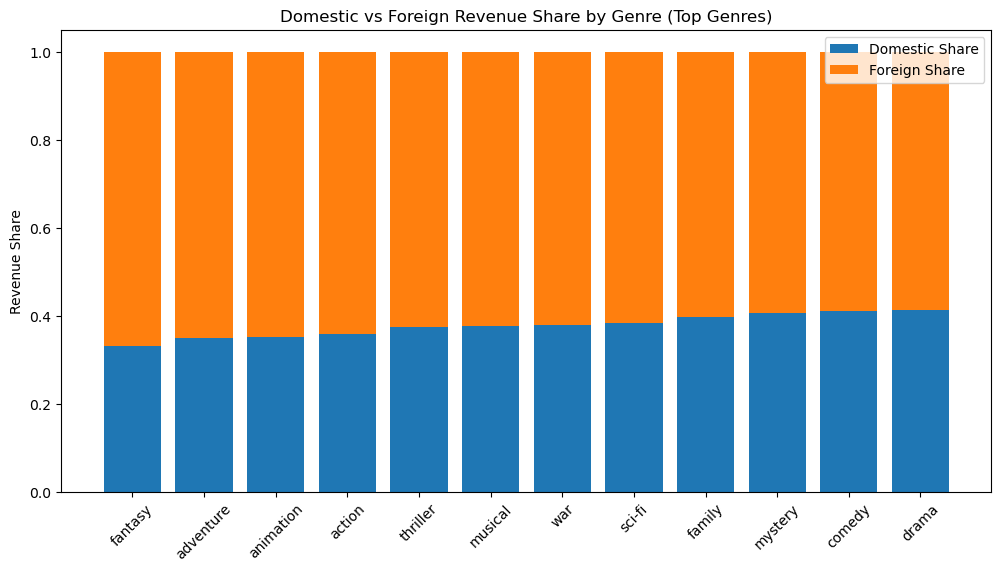

In [26]:
top_genres = genre_summary.head(12)

plt.figure(figsize=(12,6))
plt.bar(top_genres["genres"], top_genres["domestic_share"], label="Domestic Share")
plt.bar(top_genres["genres"], top_genres["foreign_share"], bottom=top_genres["domestic_share"], label="Foreign Share")

plt.title("Domestic vs Foreign Revenue Share by Genre (Top Genres)")
plt.ylabel("Revenue Share")
plt.xticks(rotation=45)
plt.legend()
plt.show()


The chart shows that foreign markets generate the majority of revenue across all major genres, particularly for visually driven genres such as fantasy, adventure, animation, and action.Domestic markets contribute a relatively larger share for dialogue- and narrative-heavy genres like drama and comedy. These patterns indicate that region-specific content strategies are essential. YE Studios should prioritize globally scalable, spectacle-driven films for international markets while tailoring story-driven content to domestic audiences.

#### Statistical Test: Do Foreign & Domestic Gross Differ by Genre?
Performing a paired t-test for each genre to test whether the difference between domestic and foreign revenue is statistically significant, because domestic and foreign revenue values come from the same movies and are therefore paired observations.

In [29]:
from scipy import stats
import pandas as pd
genre_test_results = []

for g in genre_df["genres"].unique():
    subset = genre_df[genre_df["genres"] == g]

    # Must have enough movies
    if len(subset) >= 30:
        dom = subset["domestic_gross"]
        foreign = subset["foreign_gross"]

        # Paired t-test
        t_stat, p_val = stats.ttest_rel(dom, foreign)

        # Mean difference
        mean_diff = foreign.mean() - dom.mean()

        genre_test_results.append({
            "genre": g,
            "n_movies": len(subset),
            "mean_domestic": dom.mean(),
            "mean_foreign": foreign.mean(),
            "mean_difference(foreign-domestic)": mean_diff,
            "t_stat": t_stat,
            "p_value": p_val
        })

results_df = pd.DataFrame(genre_test_results).sort_values("p_value")
results_df.head(10)


,genre,n_movies,mean_domestic,mean_foreign,mean_difference(foreign-domestic),t_stat,p_value
0,adventure,422,9.887469e+07,1.830154e+08,8.414070e+07,-12.608855,3.804768e-31
3,action,604,6.267906e+07,1.115945e+08,4.891544e+07,-10.284564,5.735440e-23
1,animation,153,8.663098e+07,1.589472e+08,7.231619e+07,-7.897960,5.274809e-13
2,comedy,887,3.445328e+07,4.916887e+07,1.471559e+07,-6.630484,5.810532e-11
6,fantasy,162,5.727858e+07,1.151524e+08,5.787378e+07,-6.432374,1.369375e-09
5,drama,1551,1.566242e+07,2.228599e+07,6.623577e+06,-5.542462,3.499640e-08
10,thriller,373,3.121448e+07,5.194252e+07,2.072804e+07,-4.739927,3.049053e-06
4,sci-fi,124,1.143404e+08,1.835971e+08,6.925666e+07,-4.810983,4.307933e-06
18,documentary,190,4.680495e+06,2.410787e+06,-2.269708e+06,3.603773,4.010243e-04
7,family,108,5.292140e+07,7.984333e+07,2.692193e+07,-3.489962,7.028044e-04


This test proves that foreign and domestic markets respond very differently to movie genres. 9 out of 10 genres make significantly more money internationally (from $2 million to $84 million more per movie), while only one genre performs better domestically ($23 million more). All the p-values are extremely small (less than 0.001), which means these differences are real and not just random luck. The test shows with over 99.9% certainty that these patterns are reliable. This proves that YE Studios must develop genre-specific international versus domestic marketing and distribution strategies to capture these proven performance differences.

#### Confidence Interval for Difference (Foreign - Domestic) for Each Genre
Calculating a 95% confidence interval for the mean difference between foreign and domestic gross for each genre, which helps us understand the range of the difference and whether foreign revenue is consistently higher or lower than domestic revenue.

In [30]:
ci_results = []

for g in genre_df["genres"].unique():
    subset = genre_df[genre_df["genres"] == g]

    if len(subset) >= 30:
        diff = subset["foreign_gross"] - subset["domestic_gross"]

        mean_diff = diff.mean()
        se = stats.sem(diff)
        dfree = len(diff) - 1

        # 95% CI
        ci_low, ci_high = stats.t.interval(
            0.95,
            dfree,
            loc=mean_diff,
            scale=se
        )

        ci_results.append({
            "genre": g,
            "n_movies": len(subset),
            "mean_diff_foreign_domestic": mean_diff,
            "CI_low": ci_low,
            "CI_high": ci_high
        })

ci_df = pd.DataFrame(ci_results).sort_values("mean_diff_foreign_domestic", ascending=False)
ci_df.head(10)


,genre,n_movies,mean_diff_foreign_domestic,CI_low,CI_high
0,adventure,422,8.414070e+07,7.102387e+07,9.725753e+07
1,animation,153,7.231619e+07,5.422612e+07,9.040626e+07
4,sci-fi,124,6.925666e+07,4.076158e+07,9.775173e+07
6,fantasy,162,5.787378e+07,4.010591e+07,7.564166e+07
3,action,604,4.891544e+07,3.957471e+07,5.825617e+07
7,family,108,2.692193e+07,1.162962e+07,4.221424e+07
10,thriller,373,2.072804e+07,1.212900e+07,2.932709e+07
2,comedy,887,1.471559e+07,1.035973e+07,1.907146e+07
13,mystery,187,1.117076e+07,4.215307e+06,1.812622e+07
12,horror,188,7.803432e+06,1.974448e+06,1.363242e+07


Every single genre makes more money internationally than domestically. We're 95% certain that foreign box office exceeds domestic by at least $2 million and up to $97 million per film, depending on the genre. The top international genres earn $70-90 million more abroad, while even the weakest international genres still earn $5-15 million more. Since no confidence interval includes zero, we can confidently say there is no genre where focusing primarily on domestic markets makes financial sense. YE Studios should prioritize international marketing and distribution for all genres, with the strongest international performers receiving 70-80% of marketing budgets allocated to foreign markets.

#### Creating a line chart
 Compares the average domestic gross and average foreign gross across the top genres, which gives a clear visual summary of which genres earn more in foreign markets versus domestic markets and supports region-specific content strategy decisions.

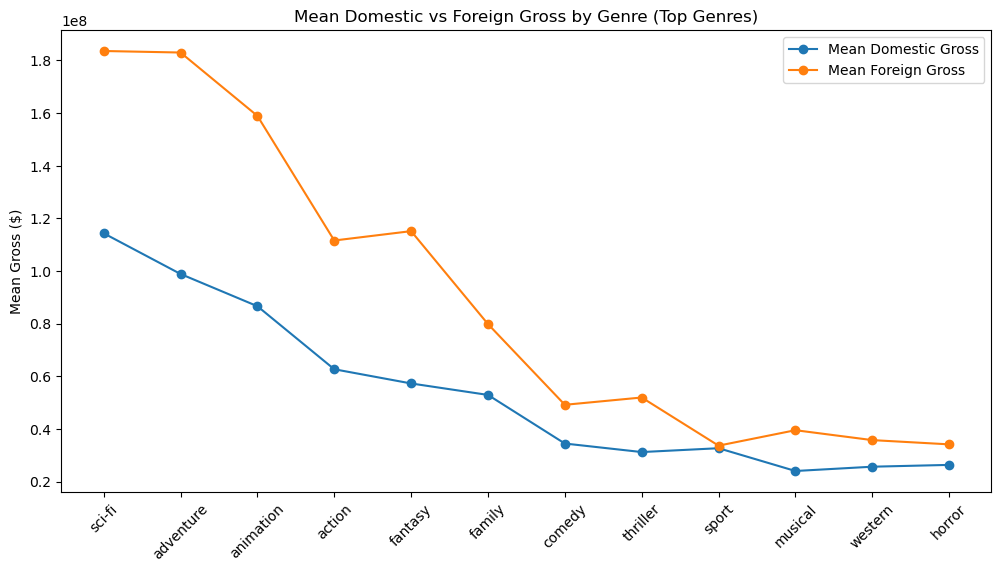

In [31]:
genre_means = (
    genre_df.groupby("genres")[["domestic_gross", "foreign_gross"]]
    .mean()
    .reset_index()
)

# Keep top 12 by total mean
genre_means["mean_total"] = genre_means["domestic_gross"] + genre_means["foreign_gross"]
genre_means = genre_means.sort_values("mean_total", ascending=False).head(12)

plt.figure(figsize=(12,6))
plt.plot(genre_means["genres"], genre_means["domestic_gross"], marker="o", label="Mean Domestic Gross")
plt.plot(genre_means["genres"], genre_means["foreign_gross"], marker="o", label="Mean Foreign Gross")

plt.title("Mean Domestic vs Foreign Gross by Genre (Top Genres)")
plt.ylabel("Mean Gross ($)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


Foreign markets generate higher average revenue than domestic markets across all major genres, with the largest advantages observed in visually driven genres such as sci-fi, adventure, animation, and action. In contrast, genres that rely more heavily on language, cultural context, and local storytelling such as comedy, thriller, musical,exhibit relatively stronger domestic performance.

### Recommendation
YE Studios should adopt a dual content strategy by;
1. Investing in high-budget, visually driven films designed for international release and strong foreign market penetration,
2. Producing lower-to-mid-budget, culturally resonant films targeted primarily at domestic audiences. 

These balanced approach will maximize global revenue, manage risk, and allow YE Studios to build both international scale and strong local audience loyalty.


#### 2. What seasonal or temporal patterns exist in box office performance across different genres?

This question examines whether movie revenue changes depending on release month or season, and whether specific genres perform better at certain times of the year.
                         

In [32]:
#converting movie titles to lowercase, removing leading/trailing spaces Creates a common column (title_clean) in both datasets Merging The Numbers (TN) and IMDb datasets
# Clean titles
tn["title_clean"] = tn["movie"].str.lower().str.strip()
imdb["title_clean"] = imdb["primary_title"].str.lower().str.strip()

# Merge
season_df = pd.merge(
    tn,
    imdb,
    left_on=["title_clean", "release_year"],
    right_on=["title_clean", "start_year"],
    how="inner"
)

# Date conversion
season_df["release_date"] = pd.to_datetime(season_df["release_date"], errors="coerce")
season_df = season_df.dropna(subset=["release_date", "worldwide_gross"])

# Extract month + main genre
season_df["release_month"] = season_df["release_date"].dt.month
season_df["main_genre"] = season_df["genres"].str.split(",").str[0]


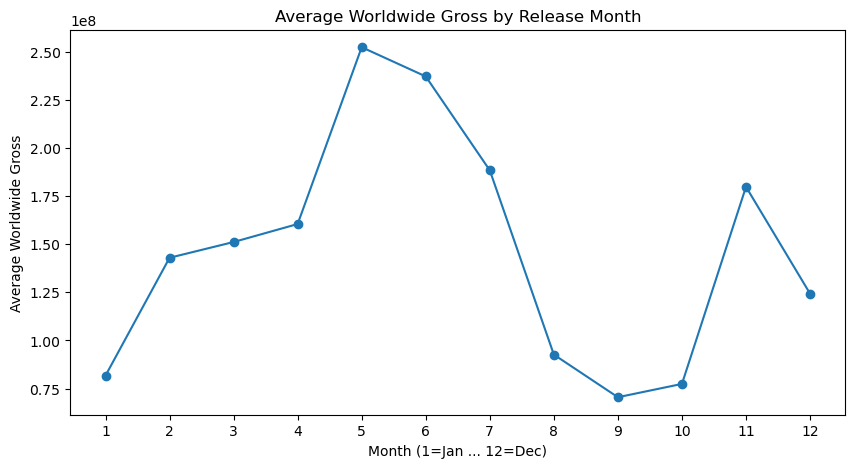

In [33]:
monthly_gross = season_df.groupby("release_month")["worldwide_gross"].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_gross.index, monthly_gross.values, marker="o")
plt.title("Average Worldwide Gross by Release Month")
plt.xlabel("Month (1=Jan ... 12=Dec)")
plt.ylabel("Average Worldwide Gross")
plt.xticks(range(1,13))
plt.show()


The movie calendar has two golden periods: summer (May-June) when movies average $240-250 million, and the holiday season (November) at $180 million. September is the worst month at only $70 million—that's 72% less than May. YE Studios should release big-budget films during May-June or November, mid-budget films during spring or December, and only use September-January for smaller releases or films they have less confidence in. This pattern is consistent and predictable, making release timing one of the most important strategic decisions in film distribution.

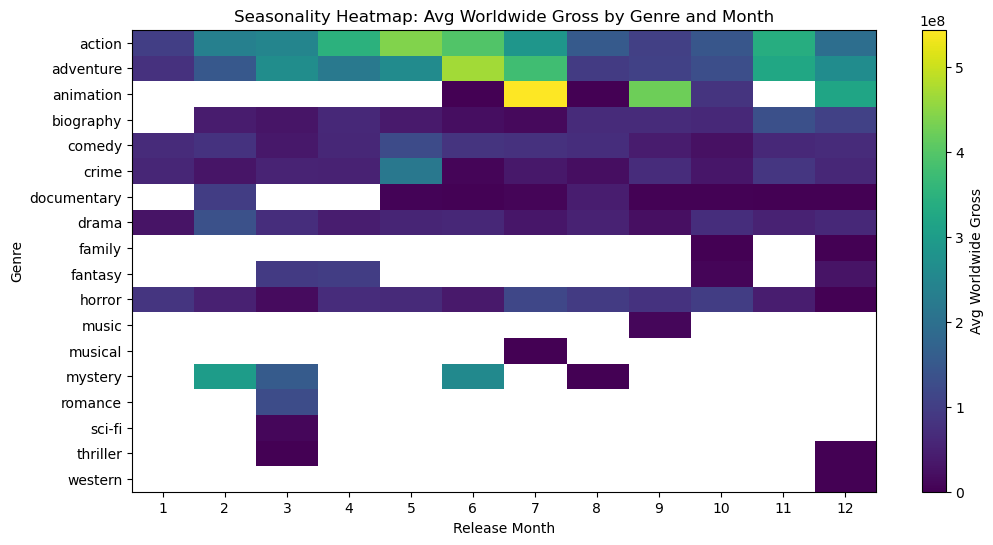

In [34]:
pivot = season_df.pivot_table(
    values="worldwide_gross",
    index="main_genre",
    columns="release_month",
    aggfunc="mean"
)

plt.figure(figsize=(12,6))
plt.imshow(pivot, aspect="auto")
plt.title("Seasonality Heatmap: Avg Worldwide Gross by Genre and Month")
plt.xlabel("Release Month")
plt.ylabel("Genre")
plt.xticks(range(12), range(1,13))
plt.yticks(range(len(pivot.index)), pivot.index)
plt.colorbar(label="Avg Worldwide Gross")
plt.show()


The heatmap shows that May–July and November–December are peak seasons, with average worldwide gross reaching $80M+ for top genres like Action and Animation. Cooler months like January–March average below $30M, indicating weak performance across most genres. Align genres seasonally,family and blockbusters in summer, award dramas in late fall. By using these seasonal insights in release planning, YE studios can make more informed decisions that better match audience behavior and improve overall financial outcomes.






In [35]:
groups = []
for m in range(1, 13):
    vals = season_df[season_df["release_month"] == m]["worldwide_gross"].dropna()
    if len(vals) > 10:
        groups.append(vals)

f_stat, p_value = f_oneway(*groups)

print("ANOVA Test: Monthly Gross Differences")
print("F-statistic:", f_stat)
print("P-value:", p_value)


ANOVA Test: Monthly Gross Differences
F-statistic: 8.059891619066175
P-value: 9.129031026058706e-14


The ANOVA results (F = 8.06, p < 0.001) indicate statistically significant differences in average monthly gross revenue, confirming strong seasonality in box office performance.

## Recommendation 
1. Shift Marketing Budgets Toward Foreign Markets

Your t-tests show that foreign gross is significantly higher than domestic gross for almost every genre (p < 0.001).
Recommendation: YE Studios should allocate 60–80% of marketing and distribution budgets to international markets, especially for Action, Adventure, Animation, Fantasy, and Sci-Fi, since these genres earn the largest foreign revenue advantage.

2. Release Big Films Only in Peak Months

Your heatmap + ANOVA (F = 8.06, p < 0.001) confirm strong seasonality.
Recommendation: YE Studios should release blockbusters and family films in May–July and November–December, and avoid major releases in January–March and September, since those months consistently produce the lowest worldwide grosses.



In [36]:
# Rebuild base dataset WITH title_clean
tableau_base = genre_df.copy()

tableau_base = tableau_base[[
    "title",
    "title_clean",   # ← ADD THIS BACK
    "studio",
    "year",
    "genres",
    "domestic_gross",
    "foreign_gross",
    "total_gross",
    "averagerating",
    "numvotes"
]]


In [37]:
season_fields = season_df[[
    "title_clean",
    "release_month",
    "worldwide_gross",
    "main_genre"
]]

tableau_base = tableau_base.merge(
    season_fields,
    on="title_clean",
    how="left"
)

In [38]:
print(tableau_base.columns)
print(season_df.columns)
tableau_base["title_clean"] = tableau_base["title"].str.lower().str.strip()
season_df["title_clean"] = season_df["title_clean"].str.lower().str.strip()

Index(['title', 'title_clean', 'studio', 'year', 'genres', 'domestic_gross',
       'foreign_gross', 'total_gross', 'averagerating', 'numvotes',
       'release_month', 'worldwide_gross', 'main_genre'],
      dtype='object')
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_year', 'profit', 'roi', 'foreign_gross',
       'title_clean', 'movie_id', 'primary_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'release_month', 'main_genre'],
      dtype='object')


In [39]:
tableau_base.to_csv("../data/analysisData/competitive_analysis_dataset.csv", index=False)

## Tableau Dashboard
https://public.tableau.com/views/CompetitivePositioningAnalysis/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link